# Initial Installs, Imports and Dependencies

In [1]:
#install 
!pip install tiingo

In [2]:
#imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import pprint
import time
import datetime
import yfinance as yf
import numpy as np
from tiingo import TiingoClient
import seaborn as sns
%matplotlib inline

# Loading Tiingo API

In [3]:
#load Tiingo API Key
TIINGO_API_KEY = os.getenv("1b545063658e8ac3669f26afd4f3439ff66adb3f")
#load_dotenv()

import requests

headers = {
        'Content-Type': 'application/json'
        }
requestResponse = requests.get("https://api.tiingo.com/api/test?token=1b545063658e8ac3669f26afd4f3439ff66adb3f",
                                    headers=headers)
print(requestResponse.json())

from tiingo import TiingoClient

config = {
    'api_key': '1b545063658e8ac3669f26afd4f3439ff66adb3f',
    'session': True # Reuse HTTP sessions across API calls for better performance
}

# Throughout the rest of this notebook, you'll use the "client" to interact with the Tiingo backend services.
client = TiingoClient(config)

{'message': 'You successfully sent a request'}


# Importing and Cleaning Bitcoin (BTC) Data

In [4]:
#BTCUSD information
meta_data = client.get_crypto_metadata(['BTCUSD'], fmt='json')
book_data = crypto_price = client.get_crypto_top_of_book(['BTCUSD'])
history_data_BTC = client.get_crypto_price_history(tickers = ['BTCUSD'], startDate='2020-12-1',
                                endDate='2021-11-30', resampleFreq='1Day')
history_data_BTC

[{'ticker': 'btcusd',
  'baseCurrency': 'btc',
  'quoteCurrency': 'usd',
  'priceData': [{'volume': 172122.84580794908,
    'volumeNotional': 3234858504.7067456,
    'date': '2020-12-01T00:00:00+00:00',
    'tradesDone': 2118819.0,
    'close': 18793.893916419034,
    'open': 19690.216670754748,
    'low': 18062.89812033529,
    'high': 19902.917357628077},
   {'volume': 99301.03448131388,
    'volumeNotional': 1907462955.4447534,
    'date': '2020-12-02T00:00:00+00:00',
    'tradesDone': 1636220.0,
    'close': 19208.893093693732,
    'open': 18780.031909617115,
    'low': 18333.281531012995,
    'high': 19339.721844582993},
   {'volume': 87118.9630710539,
    'volumeNotional': 1692565010.714965,
    'date': '2020-12-03T00:00:00+00:00',
    'tradesDone': 1297704.0,
    'close': 19428.2042743612,
    'open': 19208.764210122692,
    'low': 18872.26551162489,
    'high': 19604.522036807055},
   {'volume': 95732.35454455041,
    'volumeNotional': 1787832740.2959814,
    'date': '2020-12-0

In [5]:
#Cleaning BTCUSD for price data
history_data_BTC[0]['priceData']

[{'volume': 172122.84580794908,
  'volumeNotional': 3234858504.7067456,
  'date': '2020-12-01T00:00:00+00:00',
  'tradesDone': 2118819.0,
  'close': 18793.893916419034,
  'open': 19690.216670754748,
  'low': 18062.89812033529,
  'high': 19902.917357628077},
 {'volume': 99301.03448131388,
  'volumeNotional': 1907462955.4447534,
  'date': '2020-12-02T00:00:00+00:00',
  'tradesDone': 1636220.0,
  'close': 19208.893093693732,
  'open': 18780.031909617115,
  'low': 18333.281531012995,
  'high': 19339.721844582993},
 {'volume': 87118.9630710539,
  'volumeNotional': 1692565010.714965,
  'date': '2020-12-03T00:00:00+00:00',
  'tradesDone': 1297704.0,
  'close': 19428.2042743612,
  'open': 19208.764210122692,
  'low': 18872.26551162489,
  'high': 19604.522036807055},
 {'volume': 95732.35454455041,
  'volumeNotional': 1787832740.2959814,
  'date': '2020-12-04T00:00:00+00:00',
  'tradesDone': 1380855.0,
  'close': 18675.32401978046,
  'open': 19428.600979366107,
  'low': 18588.699197046004,
  'hi

In [6]:
#Turn date into index and rename price data for each asset to make easier to concat for BTCUSD
Historical_Crypto_BTC=pd.DataFrame(history_data_BTC[0]['priceData'])
BTC_DAILY_CLOSE = Historical_Crypto_BTC.set_index('date')[['close']].rename(columns={'close':'BTC_DAILY_CLOSE'})
pd.to_datetime(BTC_DAILY_CLOSE.index).date
BTC_DAILY_CLOSE.index = pd.to_datetime(BTC_DAILY_CLOSE.index).date
BTC_DAILY_CLOSE

,BTC_DAILY_CLOSE
2020-12-01,18793.893916
2020-12-02,19208.893094
2020-12-03,19428.204274
2020-12-04,18675.324020
2020-12-05,19149.959281
...,...
2021-11-26,53729.054030
2021-11-27,54735.965606
2021-11-28,57291.753134
2021-11-29,57798.563566


# Importing and Cleaning Ethereum (ETH) Data

In [7]:
#ETHUSD information
meta_data = client.get_crypto_metadata(['ETHUSD'], fmt='json')
book_data = crypto_price = client.get_crypto_top_of_book(['ETHUSD'])
history_data_ETH = client.get_crypto_price_history(tickers = ['ETHUSD'], startDate='2020-12-1',
                                endDate='2021-11-30', resampleFreq='1Day')
history_data_ETH

[{'ticker': 'ethusd',
  'baseCurrency': 'eth',
  'quoteCurrency': 'usd',
  'priceData': [{'high': 635.8877563349442,
    'date': '2020-12-01T00:00:00+00:00',
    'tradesDone': 1065674.0,
    'low': 561.0153079430341,
    'volume': 2847758.3135092603,
    'open': 616.1559541585913,
    'close': 586.1392318198046,
    'volumeNotional': 1669182870.2887802},
   {'high': 604.8983457024601,
    'date': '2020-12-02T00:00:00+00:00',
    'tradesDone': 597962.0,
    'low': 575.2330843344064,
    'volume': 1319983.3455787299,
    'open': 585.8123278918125,
    'close': 596.9978052601471,
    'volumeNotional': 788027160.290448},
   {'high': 623.6223215261864,
    'date': '2020-12-03T00:00:00+00:00',
    'tradesDone': 542625.0,
    'low': 585.9732826030248,
    'volume': 1247079.32049281,
    'open': 596.9770496596266,
    'close': 615.849543984262,
    'volumeNotional': 768013230.8377005},
   {'high': 620.0825544395246,
    'date': '2020-12-04T00:00:00+00:00',
    'tradesDone': 625479.0,
    'low'

In [8]:
#Cleaning ETHUSD for price data
history_data_ETH[0]['priceData']

[{'high': 635.8877563349442,
  'date': '2020-12-01T00:00:00+00:00',
  'tradesDone': 1065674.0,
  'low': 561.0153079430341,
  'volume': 2847758.3135092603,
  'open': 616.1559541585913,
  'close': 586.1392318198046,
  'volumeNotional': 1669182870.2887802},
 {'high': 604.8983457024601,
  'date': '2020-12-02T00:00:00+00:00',
  'tradesDone': 597962.0,
  'low': 575.2330843344064,
  'volume': 1319983.3455787299,
  'open': 585.8123278918125,
  'close': 596.9978052601471,
  'volumeNotional': 788027160.290448},
 {'high': 623.6223215261864,
  'date': '2020-12-03T00:00:00+00:00',
  'tradesDone': 542625.0,
  'low': 585.9732826030248,
  'volume': 1247079.32049281,
  'open': 596.9770496596266,
  'close': 615.849543984262,
  'volumeNotional': 768013230.8377005},
 {'high': 620.0825544395246,
  'date': '2020-12-04T00:00:00+00:00',
  'tradesDone': 625479.0,
  'low': 567.4676375033324,
  'volume': 1432416.7242723198,
  'open': 615.9496273615458,
  'close': 569.2928342181235,
  'volumeNotional': 815464576.

In [9]:
#Turn date into index and rename price data for each asset to make easier to concat for ETHUSD
Historical_Crypto_ETH=pd.DataFrame(history_data_ETH[0]['priceData'])
ETH_DAILY_CLOSE = Historical_Crypto_ETH.set_index('date')[['close']].rename(columns={'close':'ETH_DAILY_CLOSE'})
pd.to_datetime(ETH_DAILY_CLOSE.index).date
ETH_DAILY_CLOSE.index = pd.to_datetime(ETH_DAILY_CLOSE.index).date
ETH_DAILY_CLOSE

,ETH_DAILY_CLOSE
2020-12-01,586.139232
2020-12-02,596.997805
2020-12-03,615.849544
2020-12-04,569.292834
2020-12-05,596.881932
...,...
2021-11-26,4040.282001
2021-11-27,4096.358260
2021-11-28,4296.204212
2021-11-29,4446.448197


# Importing and Cleaning S&P 500 (SPY) Data

In [10]:
#Calling SPY data
ticker =  ('SPY')
period1 = int(time.mktime(datetime.datetime(2020,12,1,23,59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2021,11,30,23,59).timetuple()))
interval = '1d'
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

In [11]:
#Naming dataframe
data_spy = pd.read_csv(query_string)
data_spy.head(10)
spy_history_data = pd.DataFrame(data_spy)
spy_history_data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-02,364.820007,366.959991,364.200012,366.790009,360.426392,45927000
1,2020-12-03,366.679993,368.190002,365.500000,366.690002,360.328125,62882000
2,2020-12-04,367.320007,369.850006,367.220001,369.850006,363.433289,50749900
3,2020-12-07,369.019989,369.619995,367.720001,369.089996,362.686432,48944300
4,2020-12-08,367.720001,370.779999,367.670013,370.170013,363.747742,42458900
...,...,...,...,...,...,...,...
246,2021-11-23,467.220001,469.100006,464.450012,468.190002,466.547913,73206500
247,2021-11-24,466.059998,469.570007,465.190002,469.440002,467.793518,61858800
248,2021-11-26,462.339996,463.899994,457.769989,458.970001,457.360260,112669600
249,2021-11-29,464.070007,466.559998,461.730011,464.600006,462.970520,86268800


In [12]:
#Calling necessary columns and cleaning data
spy_daily_close = spy_history_data[['Date', 'Adj Close']].rename(columns={'Adj Close':'SPY'})
spy_daily_close.set_index('Date', inplace=True)
spy_daily_close.index = pd.to_datetime(spy_daily_close.index).date
spy_daily_close = spy_daily_close.rename_axis('Date')
spy_daily_close

,SPY
Date,
2020-12-02,360.426392
2020-12-03,360.328125
2020-12-04,363.433289
2020-12-07,362.686432
2020-12-08,363.747742
...,...
2021-11-23,466.547913
2021-11-24,467.793518
2021-11-26,457.360260


# Importing and Cleaning Gold (GLD) Data

In [13]:
#Calling GLD data
ticker =  ('GLD')
period1 = int(time.mktime(datetime.datetime(2020,12,1,23,59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2021,11,30,23,59).timetuple()))
interval = '1d'
query_string1 = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

In [14]:
#Naming dataframe
data_gld = pd.read_csv(query_string1)
data_gld.head(10)
gld_history_data = pd.DataFrame(data_gld)
gld_history_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-02,170.570007,171.759995,170.149994,171.460007,171.460007,9199700
1,2020-12-03,172.639999,172.850006,171.080002,172.809998,172.809998,10457300
2,2020-12-04,172.779999,173.320007,171.589996,172.320007,172.320007,10098600
3,2020-12-07,172.559998,175.289993,172.509995,174.889999,174.889999,10555100
4,2020-12-08,175.509995,175.929993,174.720001,175.500000,175.500000,6348400
...,...,...,...,...,...,...,...
246,2021-11-23,167.279999,167.600006,166.529999,167.279999,167.279999,8047800
247,2021-11-24,166.580002,167.440002,166.320007,167.119995,167.119995,5359500
248,2021-11-26,168.600006,168.639999,166.369995,166.850006,166.850006,9605200
249,2021-11-29,166.839996,167.259995,166.380005,166.619995,166.619995,7394900


In [15]:
#Calling necessary columns and cleaning data
gld_daily_close = gld_history_data[['Date', 'Adj Close']].rename(columns={'Adj Close':'GLD'})
gld_daily_close.set_index('Date', inplace=True)
gld_daily_close.index = pd.to_datetime(gld_daily_close.index).date
gld_daily_close = gld_daily_close.rename_axis('Date')
gld_daily_close

,GLD
Date,
2020-12-02,171.460007
2020-12-03,172.809998
2020-12-04,172.320007
2020-12-07,174.889999
2020-12-08,175.500000
...,...
2021-11-23,167.279999
2021-11-24,167.119995
2021-11-26,166.850006


# Combining DataFrames

In [16]:
combined_frame = pd.concat([spy_daily_close, gld_daily_close, ETH_DAILY_CLOSE, BTC_DAILY_CLOSE], axis=1, join="inner")
combined_frame 

,SPY,GLD,ETH_DAILY_CLOSE,BTC_DAILY_CLOSE
2020-12-02,360.426392,171.460007,596.997805,19208.893094
2020-12-03,360.328125,172.809998,615.849544,19428.204274
2020-12-04,363.433289,172.320007,569.292834,18675.324020
2020-12-07,362.686432,174.889999,591.341304,19170.308499
2020-12-08,363.747742,175.500000,554.926088,18323.411866
...,...,...,...,...
2021-11-23,466.547913,167.279999,4341.695776,57576.098440
2021-11-24,467.793518,167.119995,4272.610133,57173.264165
2021-11-26,457.360260,166.850006,4040.282001,53729.054030
2021-11-29,462.970520,166.619995,4446.448197,57798.563566


# Visualizations

<AxesSubplot:>

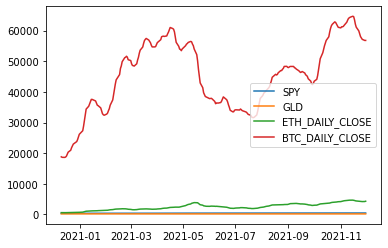

In [17]:
#Average daily close
combined_frame.rolling(window=7).mean().plot()

<AxesSubplot:>

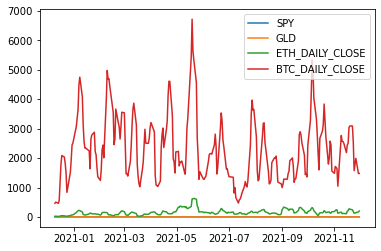

In [18]:
#Standard deviation 
combined_frame.rolling(window=7).std().plot()

<AxesSubplot:>

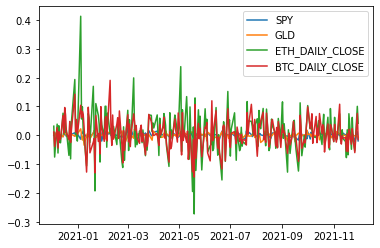

In [19]:
# Daily Returns
daily_returns = combined_frame.pct_change()
daily_returns.dropna()
daily_returns.plot()

<AxesSubplot:>

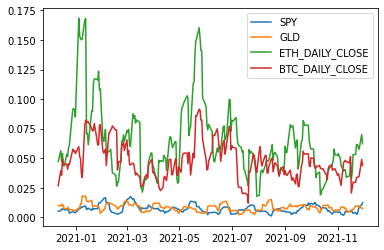

In [20]:
#Standard Deviation daily returns
daily_returns.rolling(window=7).std().plot()

<AxesSubplot:>

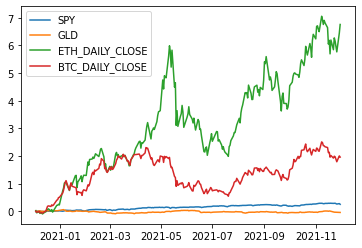

In [21]:
#Cumulative Returns
cumulative_returns = (1 + daily_returns).cumprod() - 1
cumulative_returns
cumulative_returns.plot()

In [22]:
#Correlation
correlation = daily_returns.corr()
correlation

,SPY,GLD,ETH_DAILY_CLOSE,BTC_DAILY_CLOSE
SPY,1.000000,0.195723,0.162522,0.239882
GLD,0.195723,1.000000,0.092000,-0.014059
ETH_DAILY_CLOSE,0.162522,0.092000,1.000000,0.733185
BTC_DAILY_CLOSE,0.239882,-0.014059,0.733185,1.000000


<AxesSubplot:>

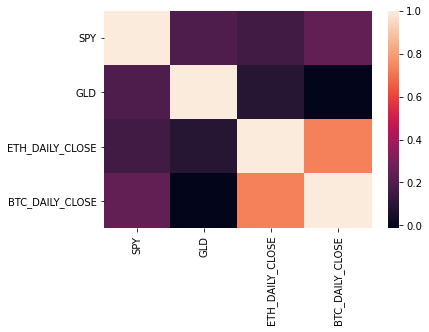

In [23]:
#Positive correlation Heatmap
sns.heatmap(correlation)

<AxesSubplot:>

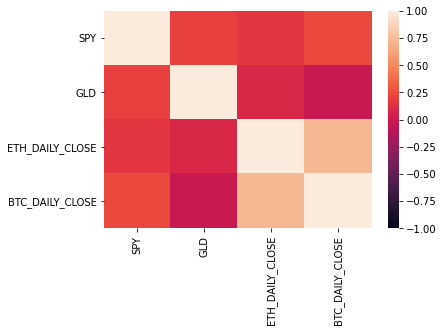

In [24]:
#Positive/negative correlation heatmap
sns.heatmap(correlation, vmin=-1, vmax=1)

KeyError: "None of [Index(['SPY_History', 'GLD_History'], dtype='object')] are in the [columns]"